# Intro to CNN and CV with tensorflow (Binary & Multi-Class Classification with ConvNets)

In [1]:
#data
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-07-30 07:09:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   122MB/s    in 0.9s    

2021-07-30 07:09:34 (122 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
#inspect data
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
#extra file is .ds_store
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 30 07:09 .
drwxr-xr-x 1 root root 4096 Jul 30 07:09 ..
-rw-r--r-- 1 root root 6148 Jul 30 07:09 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 30 07:09 test
drwxr-xr-x 4 root root 4096 Jul 30 07:09 train


In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [8]:
import pathlib

import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created list of classnames from sub directory
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


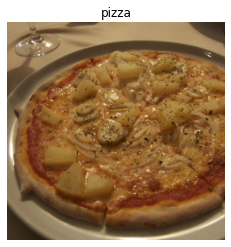

In [10]:
img = view_random_image(target_dir='pizza_steak/train/',
                       target_class='pizza')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[169, 139, 101],
        [170, 140, 102],
        [170, 140, 102],
        ...,
        [ 43,  33,  23],
        [ 42,  32,  22],
        [ 42,  32,  22]],

       [[169, 139, 101],
        [169, 139, 101],
        [170, 140, 102],
        ...,
        [ 45,  35,  25],
        [ 44,  34,  24],
        [ 44,  34,  24]],

       [[168, 140, 101],
        [168, 140, 101],
        [168, 140, 101],
        ...,
        [ 47,  37,  27],
        [ 46,  36,  26],
        [ 46,  36,  26]],

       ...,

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 92,  76,  61],
        [ 85,  72,  56],
        [ 81,  67,  54]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 81,  67,  54],
        [ 76,  62,  49],
        [ 72,  58,  45]],

       [[ 66,  50,  34],
        [ 65,  49,  33],
        [ 64,  48,  32],
        ...,
        [ 75,  61,  4

In [12]:
img.shape

(512, 512, 3)

In [13]:
img/255.

array([[[0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.16862745, 0.12941176, 0.09019608],
        [0.16470588, 0.1254902 , 0.08627451],
        [0.16470588, 0.1254902 , 0.08627451]],

       [[0.6627451 , 0.54509804, 0.39607843],
        [0.6627451 , 0.54509804, 0.39607843],
        [0.66666667, 0.54901961, 0.4       ],
        ...,
        [0.17647059, 0.1372549 , 0.09803922],
        [0.17254902, 0.13333333, 0.09411765],
        [0.17254902, 0.13333333, 0.09411765]],

       [[0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        [0.65882353, 0.54901961, 0.39607843],
        ...,
        [0.18431373, 0.14509804, 0.10588235],
        [0.18039216, 0.14117647, 0.10196078],
        [0.18039216, 0.14117647, 0.10196078]],

       ...,

       [[0.25882353, 0.19607843, 0.13333333],
        [0.25490196, 0.19215686, 0.12941176],
        [0.25098039, 0

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)

#cnn model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_1.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 214ms/step - loss: 0.6447 - accuracy: 0.6033 - val_loss: 0.4743 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4476 - accuracy: 0.7947 - val_loss: 0.3466 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4078 - accuracy: 0.8227 - val_loss: 0.3665 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3751 - accuracy: 0.8413 - val_loss: 0.3133 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3577 - accuracy: 0.8473 - val_loss: 0.3219 - val_accuracy: 0.8580


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 1.1835 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 193ms/step - loss: 1.7885 - accuracy: 0.6347 - val_loss: 1.1298 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.8921 - accuracy: 0.6980 - val_loss: 1.3535 - val_accuracy: 0.5440
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.7907 - accuracy: 0.7213 - val_loss: 0.5162 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4472 - accuracy: 0.8013 - val_loss: 0.4691 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4725 - accuracy: 0.7927 - val_loss: 0.5277 - val_accuracy: 0.7400


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
#almost 500 times

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


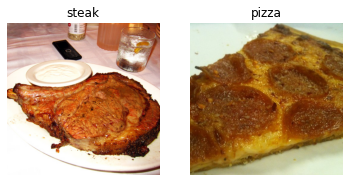

In [21]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [22]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [23]:
#turn data into batches
#small subset of data our model may only look at 32
!nvidia-smi

Fri Jul 30 07:12:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
#train and test data generators and rescale 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
#load in image data and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)                             

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [27]:
len(train_data)

47

In [28]:
len(test_data)

16

In [29]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [32]:
#create a model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=(3,3), 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [34]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
len(train_data), len(test_data)

(47, 16)

In [37]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.0172 - accuracy: 0.7047 - val_loss: 0.4467 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4404 - accuracy: 0.8140 - val_loss: 0.4121 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3051 - accuracy: 0.8880 - val_loss: 0.4028 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.1523 - accuracy: 0.9473 - val_loss: 0.4155 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.0417 - accuracy: 0.9920 - val_loss: 0.6065 - val_accuracy: 0.7880


In [38]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.3219 - accuracy: 0.8580


[0.3218778669834137, 0.8579999804496765]

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

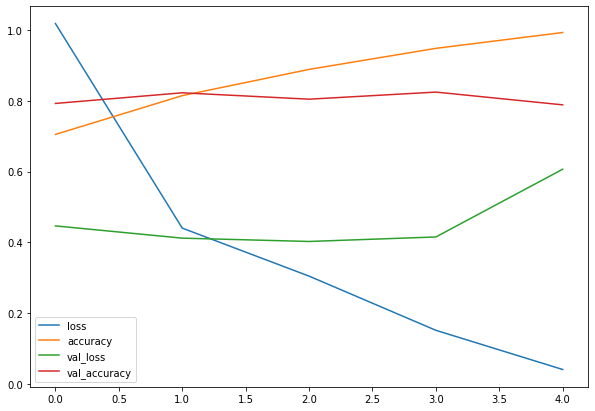

In [40]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [41]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

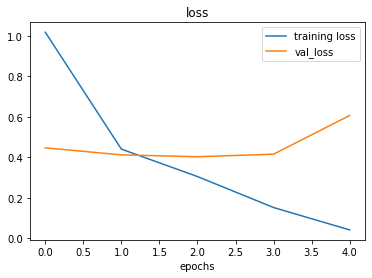

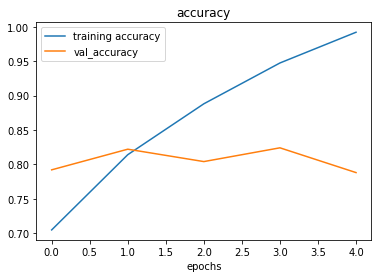

In [42]:
plot_loss_curves(history_4)

In [43]:
model_5 = Sequential([
                      Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [44]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [45]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6688 - accuracy: 0.6100 - val_loss: 0.5417 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4986 - accuracy: 0.7747 - val_loss: 0.4282 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4429 - accuracy: 0.7973 - val_loss: 0.4499 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4025 - accuracy: 0.8220 - val_loss: 0.3446 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3822 - accuracy: 0.8347 - val_loss: 0.3385 - val_accuracy: 0.8600


In [46]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

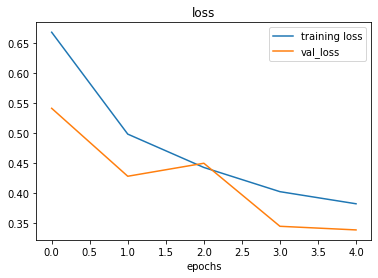

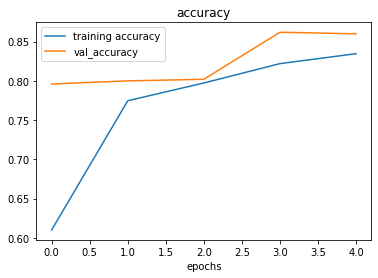

In [47]:
plot_loss_curves(history_5)

In [48]:
#DAta augmentation

In [49]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [50]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes


print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')                                           

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [51]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

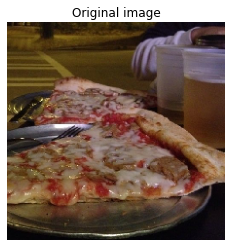

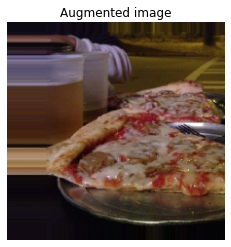

In [52]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [53]:
model_6 = Sequential([
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 485ms/step - loss: 0.7222 - accuracy: 0.4647 - val_loss: 0.6873 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.7011 - accuracy: 0.5033 - val_loss: 0.6898 - val_accuracy: 0.5380
Epoch 3/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6909 - accuracy: 0.6053 - val_loss: 0.6826 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.7000 - accuracy: 0.5633 - val_loss: 0.6767 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6930 - accuracy: 0.4933 - val_loss: 0.6716 - val_accuracy: 0.7500


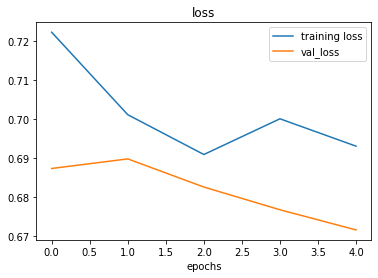

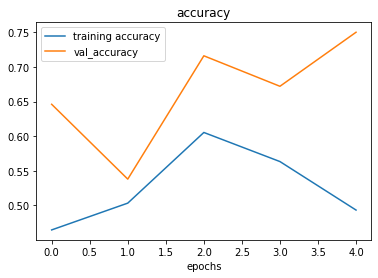

In [54]:
plot_loss_curves(history_6)

In [55]:
#shuffling the training data and the augmented training dat aand train the model

In [56]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         class_mode='binary',
                                                                         batch_size=32,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [57]:
model_7 = Sequential([
                      Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 496ms/step - loss: 0.6546 - accuracy: 0.5920 - val_loss: 0.5816 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5927 - accuracy: 0.6887 - val_loss: 0.5709 - val_accuracy: 0.6700
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5731 - accuracy: 0.7093 - val_loss: 0.5064 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5297 - accuracy: 0.7400 - val_loss: 0.3960 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4948 - accuracy: 0.7587 - val_loss: 0.3676 - val_accuracy: 0.8300


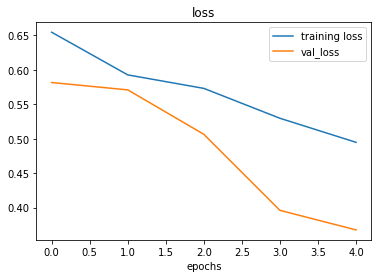

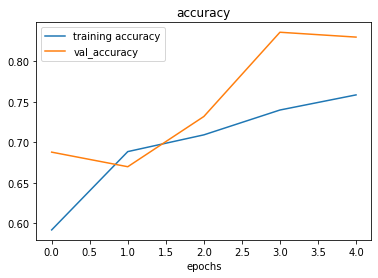

In [58]:
plot_loss_curves(history_7)

In [59]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6760)             

In [60]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## PRACTICE

In [77]:
model_8 = Sequential([
                        Conv2D(10,3,activation='relu'),
                        Conv2D(10,3,activation='relu'),
                        MaxPool2D(),
                        Conv2D(10,3,activation='relu'),
                        Conv2D(10,3,activation='relu'),
                        MaxPool2D(),
                        Flatten(),
                        Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 477ms/step - loss: 0.6759 - accuracy: 0.6033 - val_loss: 0.5393 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 23s 500ms/step - loss: 0.5873 - accuracy: 0.7073 - val_loss: 0.4954 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5654 - accuracy: 0.7193 - val_loss: 0.4635 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5572 - accuracy: 0.7160 - val_loss: 0.4349 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 24s 502ms/step - loss: 0.5664 - accuracy: 0.7393 - val_loss: 0.4433 - val_accuracy: 0.8300


In [78]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, None, None, 10)    280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
flatten_8 (Flatten)          (None, None)             

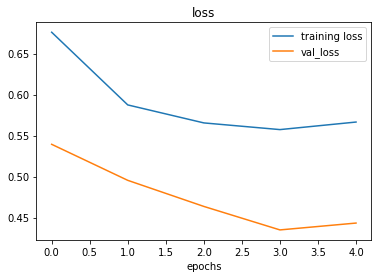

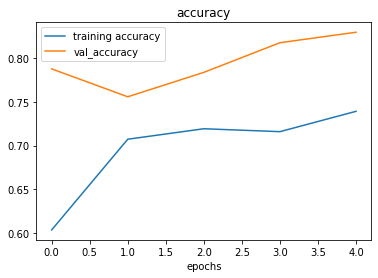

In [80]:
plot_loss_curves(history_8)

In [81]:
print(class_names)

['pizza' 'steak']


--2021-07-30 07:27:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2021-07-30 07:27:24 (34.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

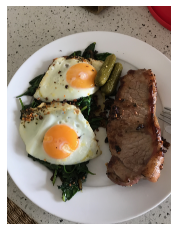

In [82]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

steak= mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [83]:
steak.shape

(4032, 3024, 3)

In [84]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [85]:
expanded_steak = tf.expand_dims(steak, axis=0).shape

In [86]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [87]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [88]:
pred=model_8.predict(tf.expand_dims(steak, axis=0))

In [89]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [90]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [91]:
def pred_and_plot(model, filename, class_name=class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  

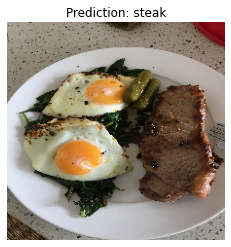

In [92]:
pred_and_plot(model_8, '03-steak.jpeg')

MODEL WORKS!!

--2021-07-30 07:27:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-07-30 07:27:31 (38.7 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



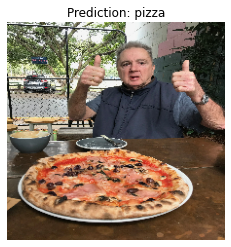

In [93]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, '03-pizza-dad.jpeg')

---

# MULTI-CLASS CLASSIFICATION

In [94]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2021-07-30 07:36:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   227MB/s    in 2.2s    

2021-07-30 07:36:43 (227 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [95]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [96]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [98]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (382, 512, 3)


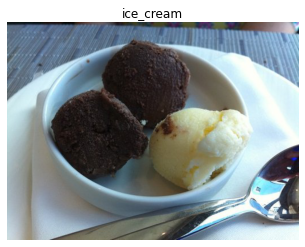

In [112]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [113]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
                      Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(pool_size=2),
                      Flatten(),
                      Dense(10, activation='softmax')
])


model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [124]:
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 196ms/step - loss: 2.0951 - accuracy: 0.2313 - val_loss: 1.9965 - val_accuracy: 0.2688
Epoch 2/5
235/235 [==============================] - 46s 197ms/step - loss: 1.8173 - accuracy: 0.3724 - val_loss: 1.9010 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.4201 - accuracy: 0.5177 - val_loss: 2.0683 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 0.8353 - accuracy: 0.7279 - val_loss: 2.6660 - val_accuracy: 0.2804
Epoch 5/5
235/235 [==============================] - 47s 198ms/step - loss: 0.3215 - accuracy: 0.9028 - val_loss: 3.4390 - val_accuracy: 0.2596


In [125]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 3.4390 - accuracy: 0.2596


[3.438978910446167, 0.2596000134944916]

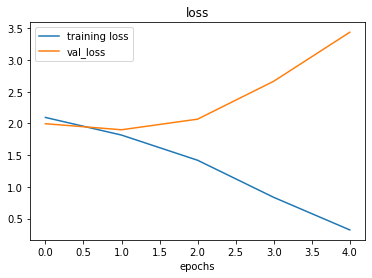

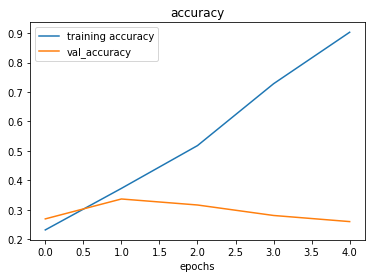

In [126]:
plot_loss_curves(history_9)

Overfitting unfortunately ;_;

In [127]:
#simplying the model 1st
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 28090)           

In [130]:
model_10 = Sequential([
                       Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
                       MaxPool2D(pool_size=2),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.1593 - accuracy: 0.2379 - val_loss: 1.9689 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.7815 - accuracy: 0.3943 - val_loss: 1.8958 - val_accuracy: 0.3400
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.4565 - accuracy: 0.5229 - val_loss: 1.9454 - val_accuracy: 0.3452
Epoch 4/5
235/235 [==============================] - 42s 177ms/step - loss: 1.0019 - accuracy: 0.6824 - val_loss: 2.2218 - val_accuracy: 0.3212
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.5798 - accuracy: 0.8299 - val_loss: 2.6099 - val_accuracy: 0.3012


In [131]:
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

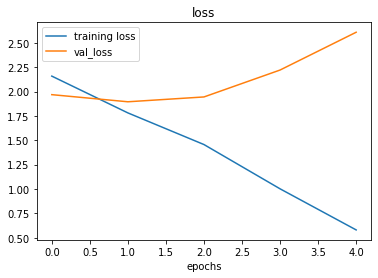

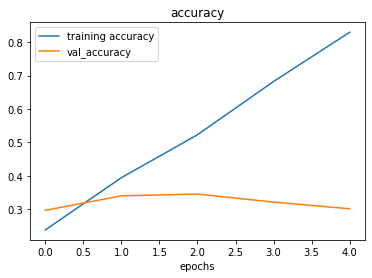

In [132]:
plot_loss_curves(history_10)

Its overfitting still ;_;

In [133]:
#data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [135]:
model_11 = tf.keras.models.clone_model(model_9)

model_11.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

model_11.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 28090)           

In [138]:
history_11= model_11.fit(train_data_augmented,
                         epochs=5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 111s 471ms/step - loss: 2.1688 - accuracy: 0.2024 - val_loss: 2.0417 - val_accuracy: 0.2640
Epoch 2/5
235/235 [==============================] - 110s 466ms/step - loss: 2.0931 - accuracy: 0.2456 - val_loss: 1.9323 - val_accuracy: 0.3072
Epoch 3/5
235/235 [==============================] - 111s 473ms/step - loss: 2.0413 - accuracy: 0.2777 - val_loss: 1.9267 - val_accuracy: 0.3224
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 1.9775 - accuracy: 0.3080 - val_loss: 1.8650 - val_accuracy: 0.3708
Epoch 5/5
235/235 [==============================] - 110s 470ms/step - loss: 1.9266 - accuracy: 0.3243 - val_loss: 1.7899 - val_accuracy: 0.4048


In [139]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 3.4390 - accuracy: 0.2596


[3.438979387283325, 0.2596000134944916]

In [140]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.7899 - accuracy: 0.4048


[1.7899062633514404, 0.4047999978065491]

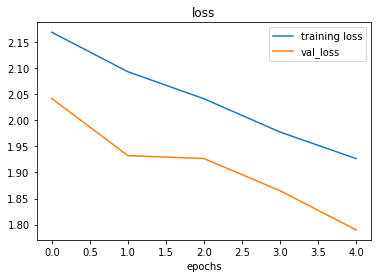

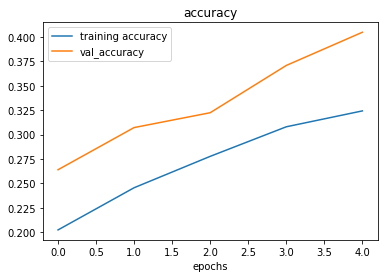

In [142]:
plot_loss_curves(history_11)

MUCH BETTER!!!!!!


# making predictions on custom images

In [143]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [148]:
#reconfig pred and plot

def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

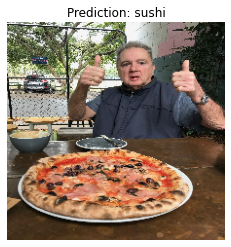

In [150]:
pred_and_plot(model=model_11,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

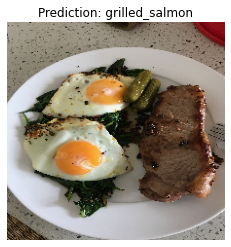

In [151]:
pred_and_plot(model=model_11,
              filename='03-steak.jpeg',
              class_names=class_names)

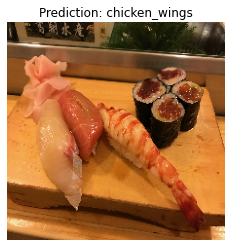

In [152]:
pred_and_plot(model=model_11,
              filename='03-sushi.jpeg',
              class_names=class_names)

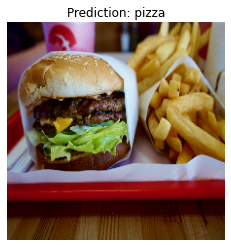

In [153]:
pred_and_plot(model=model_11,
              filename='03-hamburger.jpeg',
              class_names=class_names)

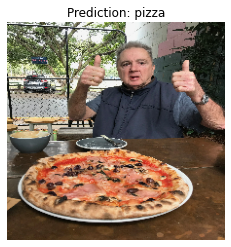

In [154]:
pred_and_plot(model_3,
              filename='03-pizza-dad.jpeg',
              class_names=['pizza','steak'])

It needs some work tbh 😅
as only achieved 40% acc 


> Indented block



In [155]:
#saving and loading our model
model_11.save('saved_trained_model_11.h5')

In [156]:
#load check

loaded_model_11 = tf.keras.models.load_model('saved_trained_model_11.h5')
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.7899 - accuracy: 0.4048


[1.7899062633514404, 0.4047999978065491]

In [157]:
#comparing
model_11.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.7899 - accuracy: 0.4048


[1.7899065017700195, 0.4047999978065491]

----
----